In [2]:
# COVID 19 PROJECT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('covid_19_clean_complete (1).csv')

In [10]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
df.shape

(49068, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [16]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [18]:
df.rename(columns ={'Province/State': 'State', 'Country/Region': 'Country'},inplace = True)

In [20]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [22]:
df.Date.value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [24]:
df.Date.max()

'2020-07-27'

In [26]:
df[df['Date'] == '2020-01-22']

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
256,NaN,Sao Tome and Principe,0.186400,6.613100,2020-01-22,0,0,0,0,Africa
257,NaN,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0,Eastern Mediterranean
258,NaN,Comoros,-11.645500,43.333300,2020-01-22,0,0,0,0,Africa
259,NaN,Tajikistan,38.861000,71.276100,2020-01-22,0,0,0,0,Europe


In [28]:
top = df[df['Date'] == '2020-07-27']
top.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [30]:
top.groupby(by='Country')[['Confirmed',	'Deaths', 'Recovered',	'Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [32]:
confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()

In [34]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [36]:
confirmed.tail()

,Date,Confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [38]:
df.Date.unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

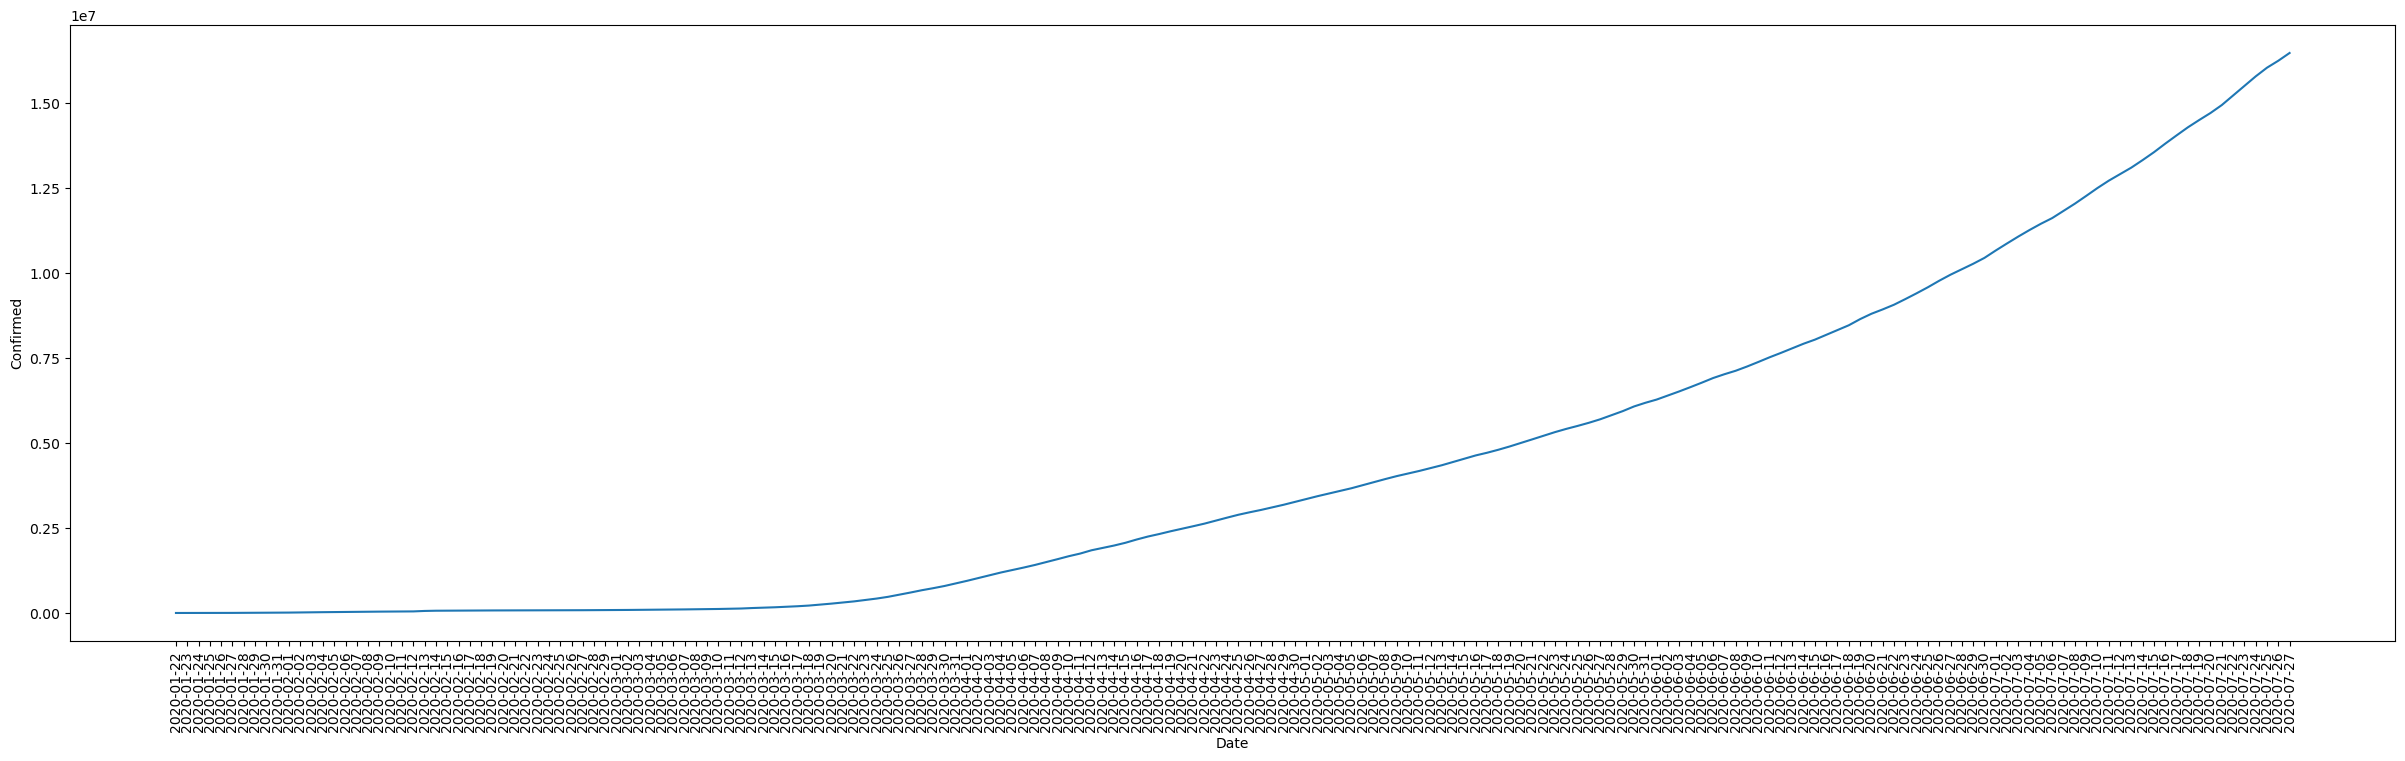

In [41]:
plt.figure(figsize = (30,8))
sns.lineplot(data = confirmed, x = 'Date', y='Confirmed')
plt.xticks(rotation = 90)
plt.show()

In [43]:
top_10_recovered = df.groupby(by='Country')['Recovered'].sum()

In [45]:
top_10_recovered.sort_values(ascending=False, inplace= True)

In [47]:
top_10_recovered.head(10)

Country
US         56353416
Brazil     54492873
Russia     25120448
India      23783720
Germany    17107839
Italy      15673910
Iran       15200895
Spain      15093583
Turkey     13345389
Chile      13292593
Name: Recovered, dtype: int64

In [49]:
top_10_active = df.groupby(by='Country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
# Method chaining

In [51]:
top_10_active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


In [53]:
US = df[df['Country'] == 'US']
US.tail()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas
49030,NaN,US,40.0,-100.0,2020-07-27,4290259,148011,1325804,2816444,Americas


In [55]:
India = df[df['Country'] == 'India']
India.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [57]:
China = df[df['Country'] == 'China']
China.tail()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific
48887,Zhejiang,China,29.1832,120.0934,2020-07-27,1270,1,1268,1,Western Pacific


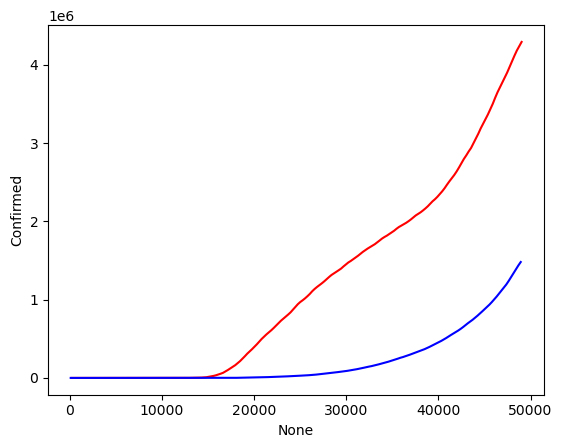

In [59]:
sns.lineplot(data=US,x=US.index, y=US.Confirmed, color = 'Red')
sns.lineplot(data=India,x=India.index, y=India.Confirmed, color = 'Blue')
plt.show()

In [61]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --------------- ------------------------ 5.2/13.3 MB 29.0 MB/s eta 0:00:01
   ----------------------------------- ---- 11.8/13.3 MB 30.8 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 30.4 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 20.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 31.2 MB/s eta 0:00:00


In [65]:
df1 = pd.read_csv('covid_19_clean_complete (1).csv')

In [67]:
confirmed = df1.groupby(by = 'Date')['Confirmed'].sum().reset_index()

In [69]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [71]:
confirmed.columns = ['ds','y']
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [84]:
from prophet import Prophet
m = Prophet()

In [86]:
m.fit(confirmed)

12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:55:26 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
# Keyword alert: method name: make_future_dataframe()
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.356186e+03,-1.219370e+05,8.347553e+04,-9.356186e+03,-9.356186e+03,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,-2.034240e+04
1,2020-01-23,-6.667734e+03,-1.132687e+05,9.529491e+04,-6.667734e+03,-6.667734e+03,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,-7.746625e+03
2,2020-01-24,-3.979282e+03,-9.948571e+04,1.024102e+05,-3.979282e+03,-3.979282e+03,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,6.123967e+03
3,2020-01-25,-1.290830e+03,-8.464323e+04,1.147736e+05,-1.290830e+03,-1.290830e+03,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.237938e+04
4,2020-01-26,1.397622e+03,-9.743124e+04,1.104438e+05,1.397622e+03,1.397622e+03,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,8.615766e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674928e+07,1.663995e+07,1.685499e+07,1.674427e+07,1.675433e+07,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,1.674820e+07
191,2020-07-31,1.695352e+07,1.685456e+07,1.706344e+07,1.694263e+07,1.696487e+07,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,1.696362e+07
192,2020-08-01,1.715776e+07,1.706740e+07,1.727774e+07,1.713816e+07,1.717740e+07,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.717143e+07
193,2020-08-02,1.736200e+07,1.726243e+07,1.748496e+07,1.733335e+07,1.739375e+07,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,1.736922e+07


In [88]:
forecast[['ds','yhat','yhat_lower',	'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.034240e+04,-1.219370e+05,8.347553e+04
1,2020-01-23,-7.746625e+03,-1.132687e+05,9.529491e+04
2,2020-01-24,6.123967e+03,-9.948571e+04,1.024102e+05
3,2020-01-25,1.237938e+04,-8.464323e+04,1.147736e+05
4,2020-01-26,8.615766e+03,-9.743124e+04,1.104438e+05
...,...,...,...,...
190,2020-07-30,1.674820e+07,1.663995e+07,1.685499e+07
191,2020-07-31,1.696362e+07,1.685456e+07,1.706344e+07
192,2020-08-01,1.717143e+07,1.706740e+07,1.727774e+07
193,2020-08-02,1.736922e+07,1.726243e+07,1.748496e+07


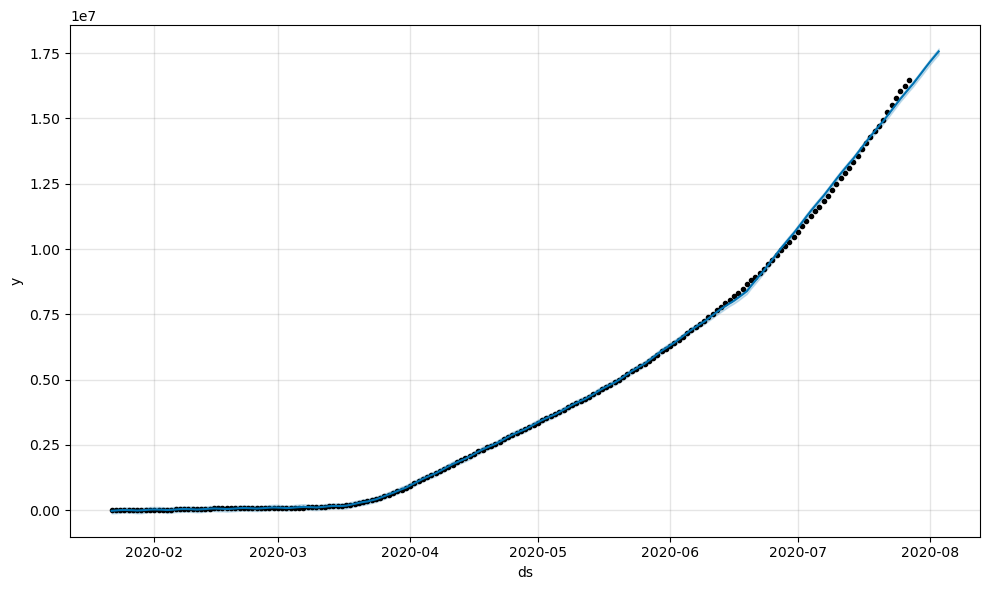

In [89]:
m.plot(forecast)
plt.show()

In [94]:
import plotly
import plotly.express as px

In [96]:
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [98]:
world = df1.groupby(by='Country/Region')[['Confirmed',
       'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [100]:
world

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [104]:
fig = px.choropleth(world,locations = 'Country/Region',
                    locationmode= 'country names',
                    color = 'Active',hover_name = 'Country/Region',
                    color_continuous_scale='blues',
                    title='Countries with Active cases')
fig.show()